### Logistic Regression Training Script
#### Author: Austin Fernandez
#### Date Modified: April 8, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train = np.empty((0,5))
y_train = np.array([])
    
with open("Toy Dataset.csv","r") as f:
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    for line in d_reader:
        if first:
            first = False
            continue
        x_train = np.append(x_train,np.array(list(map(int,line[2:7]))).reshape((1,5)),axis=0)
        y_train = np.append(y_train,int(line[8]))
print(x_train.shape)
print(y_train.shape)
# print(y_train)

(419, 5)
(419,)


In [3]:
# LogisticRegression, RandomizedSearch
random_search_iterations = 200
k_folds = 10
seed = 48151623

parameters = {
    'penalty':['l1','l2'], 
    'C': uniform(loc=0,scale=4),
    'fit_intercept' : [True,False],
    'solver' : ['liblinear', 'saga'],
    'max_iter' : [100,200,300,400,500,600,700,800,900,1000]
}
mnb = LogisticRegression()
random_search_logreg = RandomizedSearchCV(mnb, parameters,cv=k_folds,n_iter=random_search_iterations,random_state=seed)
random_search_logreg.fit(x_train,y_train)
print("Best Score: {:.4f}".format(random_search_logreg.best_score_))
for k,v in random_search_logreg.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_logreg.n_splits_))
y_out = random_search_logreg.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3462
C => 0.18630853866462704
fit_intercept => True
max_iter => 800
penalty => l1
solver => saga
Splits: 10
Accuracy: 34.6062%


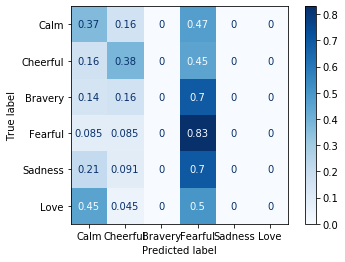

In [4]:
disp = plot_confusion_matrix(random_search_logreg, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [ ]:
# MLPClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 10
seed = 48151623

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [1 / np.power(10,x) for x in range(1,10)],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [100,200,300,400,500],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier()
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,n_iter=random_search_iterations,random_state=seed, n_jobs=-1)
random_search_mlp.fit(x_train,y_train)
print("Best Score: {:.4f}".format(random_search_mlp.best_score_))
for k,v in random_search_mlp.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(random_search_mlp.n_splits_))
y_out = rscv.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

In [ ]:
disp = plot_confusion_matrix(random_search_mlp, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')
